<h3>Given:</h3>
The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed.
<h3>Objective:</h3>
The classification goal is to predict the likelihood of a customer subscribing term deposit
loans.

<h2>1. Reading the data</h2>

In [6]:
# Importing the libraries
import pandas as pd        # for data manipulation
import seaborn as sns      # for statistical data visualisation
import numpy as np         # for linear algebra
import matplotlib.pyplot as plt      # for data visualization
from scipy import stats        # for calculating statistics

# Importing various machine learning algorithm from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score
from  sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [149]:
dataframe= pd.read_csv("bank-full.csv")  # Reading the data
dataframe.head()   # showing first 5 datas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [190]:
dataframe.shape

(45211, 17)

The data given has  17 columns and consist of 45211 data. And all the data is read correctly.

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<body>
    The above information shows the following:<br>
    a. There are no null or missing values present <br>
    b. The attributes are either int or object <br>
    c. Further there maybe necessary to label encode this objects<br>
    d. Many attribute has "unknown" present in the data that may mean different for each of the attribute accordingly
       <br><br>


In [192]:
dataframe.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no null values in any row or column

In [193]:
dataframe.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

From  the data:<br>

8 variable have interval data:
<ul><li>Age: Age of the customer</li>
<li>Balance: average yearly balance, in euros</li>
<li>Day: last contact day of the month</li>
<li>Duration: last contact duration, in seconds (numeric). </li>
<li>Month: last contact month of the year</li>
<li>Campaign: number of contacts performed during this campaign and for this
client</li>
<li>Pdays: number of days that passed by after the client was last contacted from a
previous campaign</li>
<li>Previous: number of contacts performed before this campaign and for this client</li>

</ul>

4 variables have categorical data:
<ul><li>Housing: has housing loan?</li>
<li>Loan: has personal loan?</li>
<li>Target: customer have a certificate of deposit or not </li>
<li>Defualt: has credit in default? </li>

</ul>
5 variables contains Ordinal categorical data:
<ul><li>Marital: marital status</li>
<li>Job: Type of job</li>
<li>Education: Education level of the customer</li>
<li>Contact: contact communication type</li>
<li>Poutcome: outcome of the previous marketing campaign</li>
</ul>


In [195]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The balance and pdays column data contain negative values as experience. This can be seen in the value of min of Experience.The data in balance my go negative as the customer may have loan but in pdays column days cannot go negative, therefore may need cleansing.<br><br>
Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,362. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. 



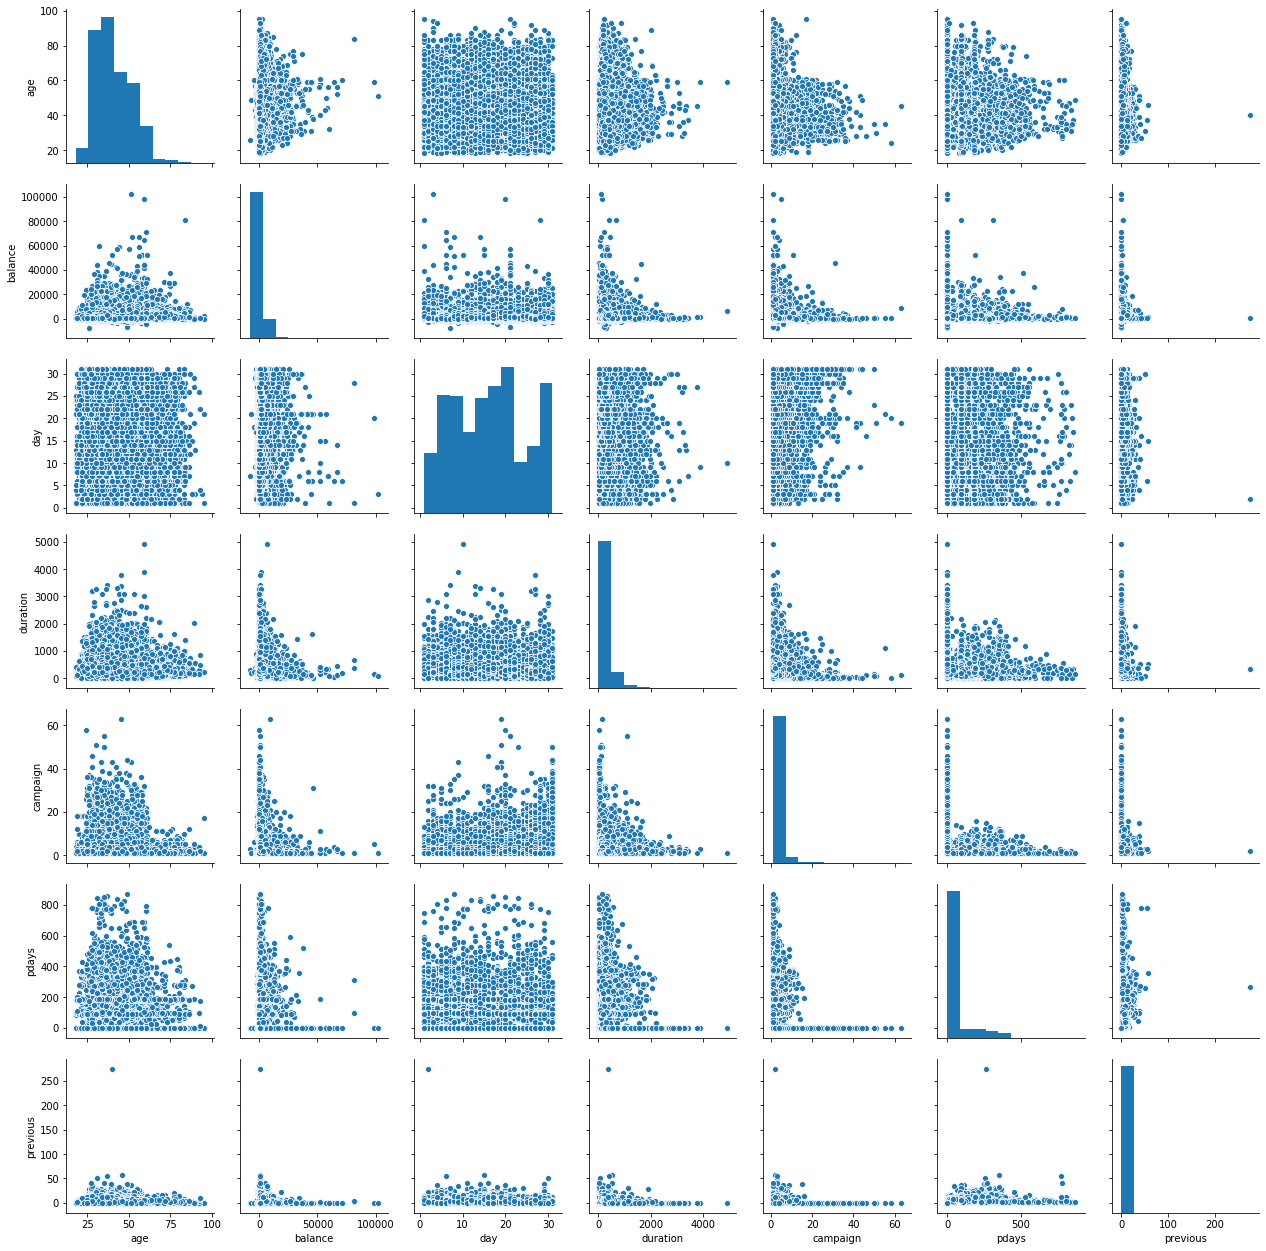

In [196]:
sns.pairplot(dataframe)

In [197]:
dataframe.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

Target will be our target column

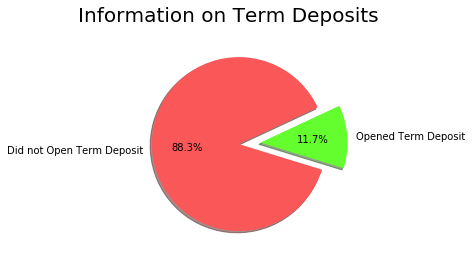

In [200]:
f = plt.subplots(1, figsize=(12,4))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Deposit", "Opened Term Deposit"

plt.suptitle('Information on Term Deposits', fontsize=20)

plt.pie(dataframe.Target.value_counts(),explode=[0,0.25], shadow=True,colors=colors,labels=labels, startangle=25,autopct='%1.1f%%')

plt.show()

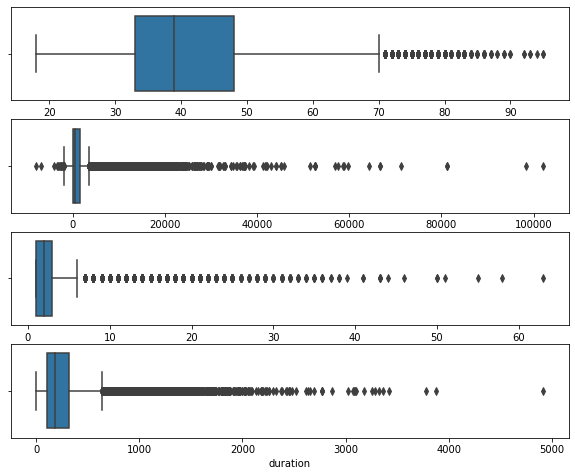

In [203]:
plt.figure(figsize=(10,10))
plt.subplot(5,1,1)
sns.boxplot(dataframe.age)
plt.subplot(5,1,2)
sns.boxplot(dataframe.balance)
plt.subplot(5,1,3)
sns.boxplot(dataframe.campaign)
plt.subplot(5,1,4)
sns.boxplot(dataframe.duration)


In [19]:
dataframe.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

<h3>Obv</h3>
The above boxplot and the above information shows:
Day feature is normally distributed, as the mean is nearly equal to median<br>
<br>
And all other attributed are hignly positively skewed as we can see the mean is greater than the medianand  has lot of outliers.<br>
<br>
There are some negative values contained in experience that actually dont make any sense. Its better to clean them by applying the median of experience of the group having same age and education but positive experience.

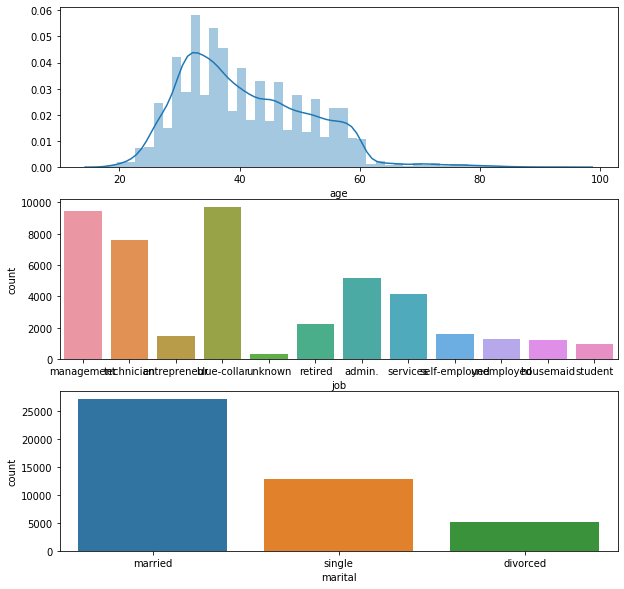

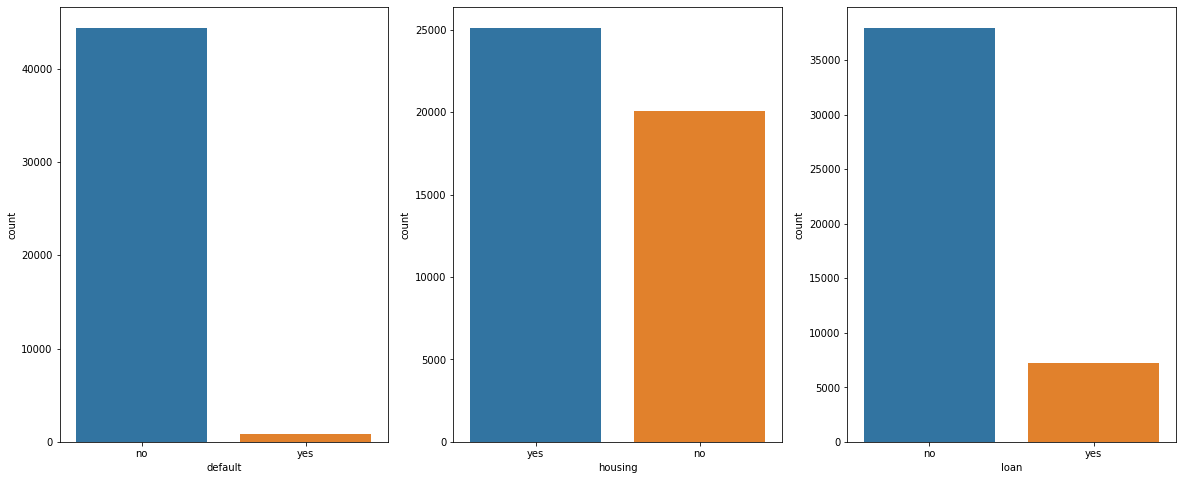

In [206]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(dataframe.age)
plt.subplot(3,1,2)
sns.countplot(dataframe.job)
plt.subplot(3,1,3)
sns.countplot(dataframe.marital)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = dataframe, ax = ax1)
sns.countplot(x = 'housing', data = dataframe, ax = ax2)
sns.countplot(x = 'loan', data = dataframe, ax = ax3)

<h3>Obv</h3>
<li>The ages dont mean to much, has a medium dispersion</li>

<li>Looks like Jobs, Marital and Education will have more effect on whether the customer will subscribe term deposit of not</li><li>Management is the occupation that is more prevalent in this dataset.</li>
<li>Can see that only few has credit as default</li>
<li>Nearly 40% of the customers has housing loan</li>
<li> And many of the customer do not have personal loan</li>


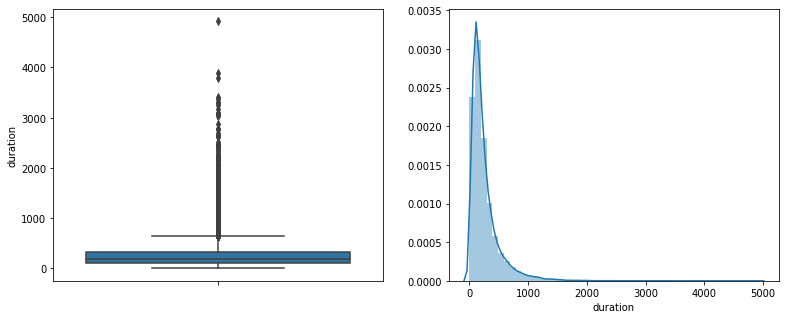

In [32]:
fig,(a1,a2)=plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = dataframe, orient = 'v', ax = a1)
sns.distplot(dataframe.duration, ax = a2)

In [15]:
dataframe[dataframe.duration==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


<h3>Obv</h3>The customer who has the duration zero indicates that they surely have not talked with bank officers which in turn means they surely have not taken the term deposit



<h2>Choosing the target column</h2>
As the objective is to redict the likelihood of a liability customer subscribing , the Target column will be target column.<br>
And the distribution is as shown

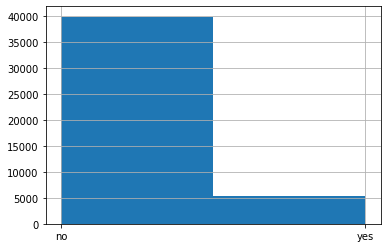

In [16]:
dataframe["Target"].hist(bins=2)

In [207]:
dataframe["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

As in the data, the count of customer how takes the term deposit is very less compared to who didn't. Due to which there maybe chances that the model perdiction will be effected due to this.<br>
<h2>Checking the influence of various attributes on customer subscribing term deposit </h2>
<h3>Influence of Default & Balance on Target</h3>



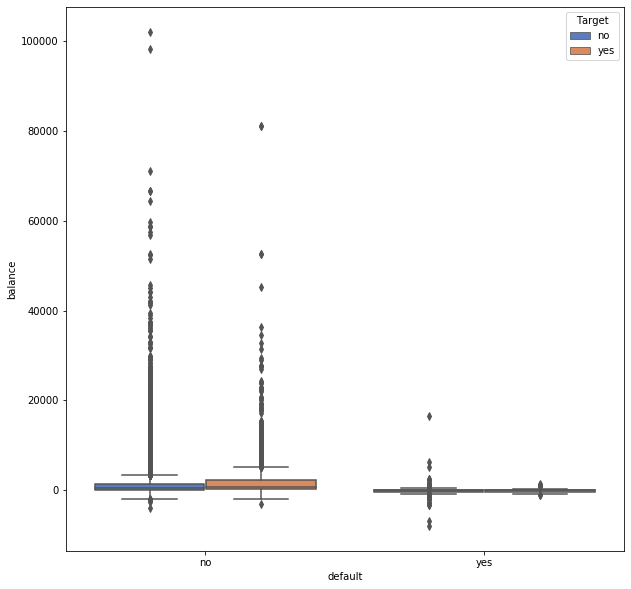

In [208]:
plt.figure(figsize=(10,10))
sns.boxplot(x='default',y='balance',data=dataframe,hue='Target',palette='muted')

<h4>Obv:</h4>  The graph shows the customers those who dont have the credit card in defualt will go for the subcribing the term deposit compared to those who have credit card.<br>
<h3>Influence of Job & Banlance on target
</h3>

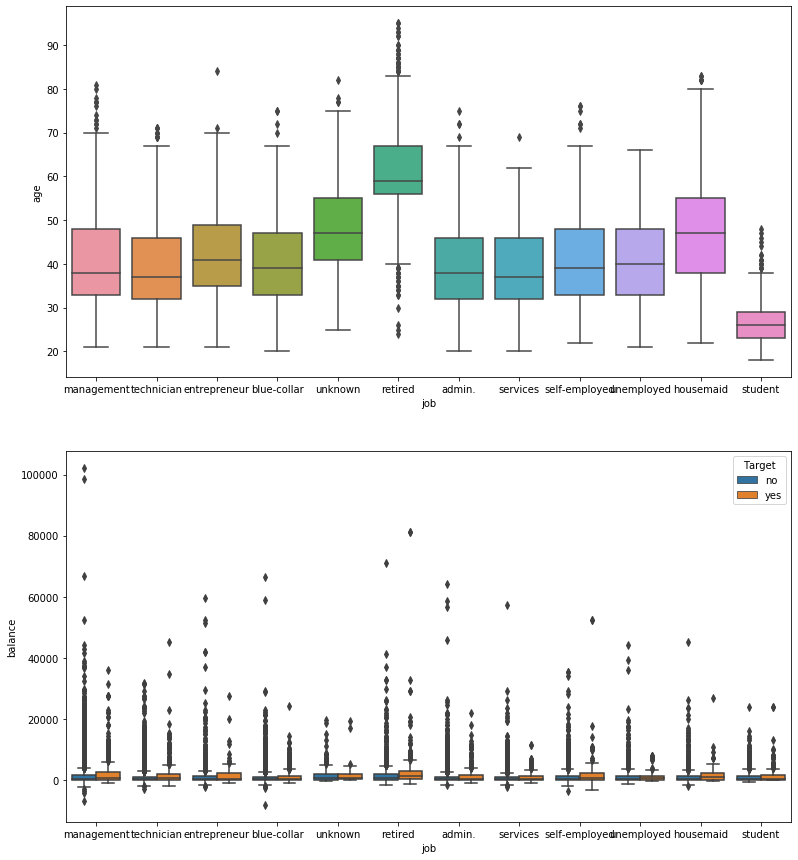

In [211]:
fig,(a1,a2)=plt.subplots(nrows = 2, ncols = 1, figsize = (13, 15))
sns.boxplot(x='job',y='age',data=dataframe,ax=a1)
sns.boxplot(x='job',y='balance',hue='Target',data=dataframe,ax=a2)


<h4>Obv</h4>a. Management is the occupation that is more prevalent in this dataset.<br>
b. As expected, the retired are the ones who have the highest median age while student are the lowest.<br>
c. Management and Retirees are the ones who have the highest balance in their accounts.

 The graph shows that the customer who has retired like to subscribe the term deposit<br>
<h3>Influence of Education on target
</h3>

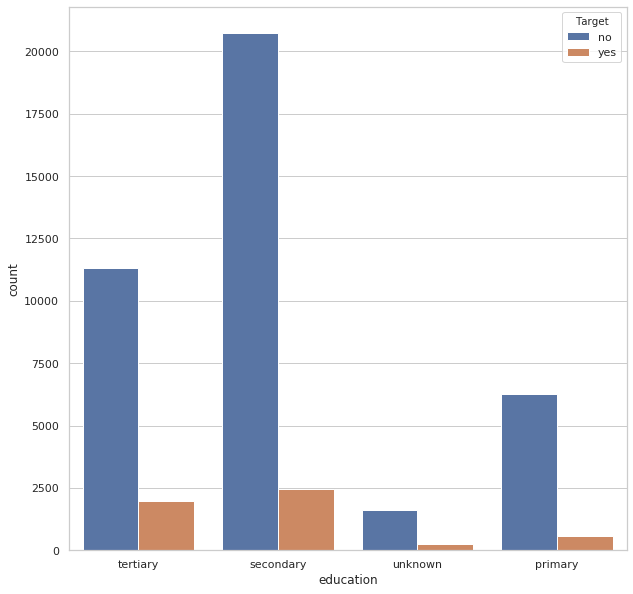

In [160]:
plt.figure(figsize=(10,10))
sns.countplot(x="education", data=dataframe,hue="Target")

<h3>Obv</h3>
The customer with secondary and tertiary education tends to subscribe term deposit as they will have goos income.

<h3>Influence of Customers' Mortgage on taking personal Loan
</h3>

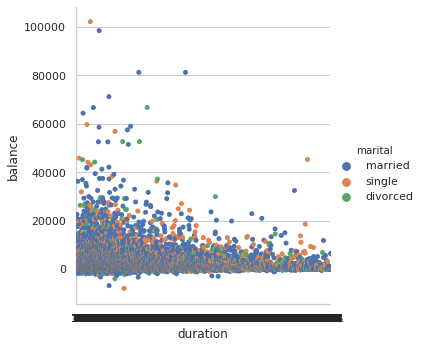

In [164]:
sns.catplot(x='duration',y='balance',data=dataframe,hue='marital')


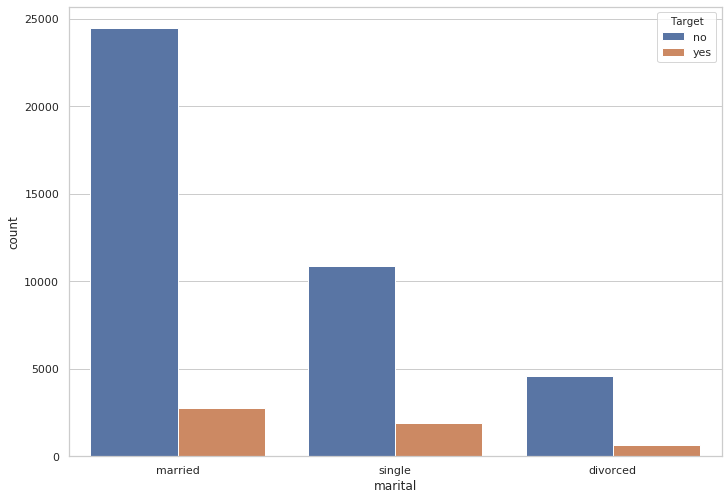

In [165]:
sns.countplot(x='marital',hue='Target',data=dataframe)

<h4>Obv</h4>The customers who are divorced looks like having low balance and also customers who Married and Single tends to have surscribed term deposit than divorced customer<br>
<h3>Influence of contact duration on taking term deposit
</h3>

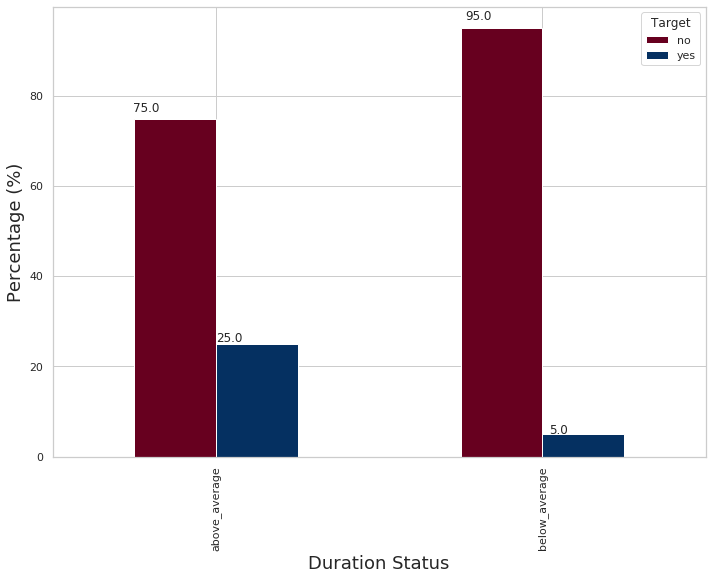

In [166]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = dataframe['duration'].mean()

lst = [dataframe]
dataframe["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(dataframe['duration_status'], dataframe['Target']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

<h3>Obv</h3>The customers who have talked with bank more than average duration are likely to subscribe the term deposit than customers who have talked below average duration<br>
<h2>Corelation of Attributes</h2>

In [7]:
labelencoder_X=LabelEncoder()
dataframe.Target=labelencoder_X.fit_transform(dataframe.Target)
corelation=dataframe.corr()

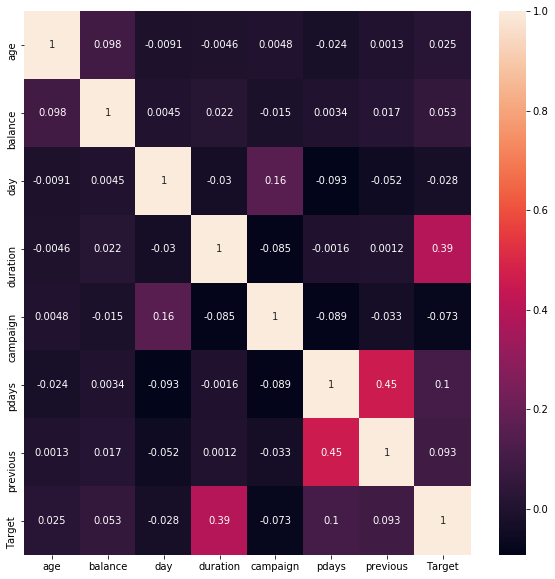

In [10]:
plt.figure(figsize=(10,10))
a=sns.heatmap(corelation,annot=True)



<h3>Obv</h3>
<li>We can see Target and duration are corelated</li>
<li> Looks like previous number of contacts performed and pdays are corelated</li>
<li>And also the last contacted day and campaign are also corelated</li>

<h2>Preparing the data for modeling</h2>
<h3>Label encoding the attributes having object datatype</h3>

In [ ]:
labelencoder_X = LabelEncoder()
dataframe['job']      = labelencoder_X.fit_transform(dataframe['job']) 
dataframe['marital']  = labelencoder_X.fit_transform(dataframe['marital']) 
dataframe['education']= labelencoder_X.fit_transform(dataframe['education']) 
dataframe['default']  = labelencoder_X.fit_transform(dataframe['default']) 
dataframe['housing']  = labelencoder_X.fit_transform(dataframe['housing']) 
dataframe['loan']     = labelencoder_X.fit_transform(dataframe['loan'])
dataframe['contact']     = labelencoder_X.fit_transform(dataframe['contact']) 
dataframe['day'] = labelencoder_X.fit_transform(dataframe['day']) 
dataframe['month'] = labelencoder_X.fit_transform(dataframe['month']) 

Its better to remove duration column from dataset but checking how it may work if we group the duration upon the quartile range on the target attribute.<br>
Also grouping the data of age attribute upon quartile range.

In [13]:
print('1º Quartile: ', dataframe['duration'].quantile(q = 0.25))
print('2º Quartile: ', dataframe['duration'].quantile(q = 0.50))
print('3º Quartile: ', dataframe['duration'].quantile(q = 0.75))
print('4º Quartile: ', dataframe['duration'].quantile(q = 1.00))

print('1º Quartile: ', dataframe['age'].quantile(q = 0.25))
print('2º Quartile: ', dataframe['age'].quantile(q = 0.50))
print('3º Quartile: ', dataframe['age'].quantile(q = 0.75))
print('4º Quartile: ', dataframe['age'].quantile(q = 1.00))

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0


In [14]:
dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 39), 'age'] = 2
dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 98), 'age'] = 4

dataframe.loc[dataframe['duration'] <= 103, 'duration'] = 1
dataframe.loc[(dataframe['duration'] > 103) & (dataframe['duration'] <= 180)  , 'duration']    = 2
dataframe.loc[(dataframe['duration'] > 180) & (dataframe['duration'] <= 319)  , 'duration']   = 3
dataframe.loc[(dataframe['duration'] > 319) & (dataframe['duration'] <= 644.5), 'duration'] = 4
dataframe.loc[dataframe['duration']  > 644.5, 'duration'] = 5



In [16]:
dataframe['poutcome'].replace(['unknown', 'failure','other','success'], [1,2,3,4], inplace  = True)
#dataframe['Target'].replace(['no', 'yes'], [0,1], inplace  = True)

In [17]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,duration_status
0,4,4,1,2,0,2143,1,0,2,4,8,3,1,-1,0,1,0,above_average
1,3,9,2,1,0,29,1,0,2,4,8,2,1,-1,0,1,0,below_average
2,1,2,1,1,0,2,1,1,2,4,8,1,1,-1,0,1,0,below_average
3,3,1,1,3,0,1506,1,0,2,4,8,1,1,-1,0,1,0,below_average
4,1,11,2,3,0,1,0,0,2,4,8,3,1,-1,0,1,0,below_average



<h2>Classification Models</h2>
<h3> Splitting the Data</h3>

In [225]:
dataframe.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'duration_status'],
      dtype='object')

In [18]:
features=['age', 'job', 'marital', 'education', 'default','balance','duration',
       'housing', 'loan', 'contact','month', 'day','campaign','pdays','previous','poutcome']
X=dataframe[features]
Y=dataframe['Target']         

As for the side note as the range of various attribute vary  a lot (like range of age is 23 to 67 where are the income is 8 to 224 having different units),there may come a need to normalize the data.<br>
But for Logestic Regression and Naive Bayes classification Normalization is not required as it doesnot effect it.<br>
For KNN algorithm normalization is required as it depends on distance of data points.

Splitting the model in 7:3 ratio

In [19]:
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1)
train_X.count() 

age          31647
job          31647
marital      31647
education    31647
default      31647
balance      31647
duration     31647
housing      31647
loan         31647
contact      31647
month        31647
day          31647
campaign     31647
pdays        31647
previous     31647
poutcome     31647
dtype: int64

In [20]:
train_X.head()

,age,job,marital,education,default,balance,duration,housing,loan,contact,month,day,campaign,pdays,previous,poutcome
6149,1,1,1,1,1,-238,4,1,0,2,8,26,1,-1,0,1
12403,2,0,2,1,0,-478,2,1,1,2,6,26,4,-1,0,1
21645,1,9,1,1,0,266,2,1,0,0,1,18,2,-1,0,1
29580,2,1,1,1,1,13,2,0,1,0,3,2,4,-1,0,1
31245,1,8,2,1,0,486,1,0,0,0,7,2,1,-1,0,1


In [21]:
test_X.count()

age          13564
job          13564
marital      13564
education    13564
default      13564
balance      13564
duration     13564
housing      13564
loan         13564
contact      13564
month        13564
day          13564
campaign     13564
pdays        13564
previous     13564
poutcome     13564
dtype: int64

In [22]:
test_X.head()

,age,job,marital,education,default,balance,duration,housing,loan,contact,month,day,campaign,pdays,previous,poutcome
3610,3,1,1,0,0,2519,3,1,0,2,8,14,4,-1,0,1
11677,2,9,1,1,0,2209,2,0,0,2,6,19,2,-1,0,1
33018,1,0,1,1,0,923,5,1,0,0,0,16,4,-1,0,1
44323,4,1,1,0,0,306,4,0,0,0,5,27,3,181,1,4
8119,1,9,2,2,0,257,3,1,0,2,6,1,5,-1,0,1


In [23]:

scaling = StandardScaler()
train_X = scaling.fit_transform(train_X)
test_X = scaling.fit_transform(test_X)
print(train_X)

[[-1.25367503 -1.01531891 -0.28105598 ... -0.41005714 -0.29935382
  -0.4139078 ]
 [-0.38372253 -1.32089076  1.36243599 ... -0.41005714 -0.29935382
  -0.4139078 ]
 [-1.25367503  1.42925595 -0.28105598 ... -0.41005714 -0.29935382
  -0.4139078 ]
 ...
 [ 0.48622997 -0.09860334 -0.28105598 ... -0.41005714 -0.29935382
  -0.4139078 ]
 [ 0.48622997 -1.32089076 -0.28105598 ... -0.41005714 -0.29935382
  -0.4139078 ]
 [ 0.48622997 -1.01531891 -0.28105598 ...  2.95946204  0.75123119
   2.45835187]]


<h2>Using Logestic Regression for prediction</h2><br>
Trianing the model

In [24]:
LR_Model=LogisticRegression(random_state=1)
Logestic_Model=LR_Model.fit(train_X,train_y)
Logestic_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting from the trained model and showing the confusion matrix

In [25]:
predict=LR_Model.predict(test_X)
print(predict[0:1000])
metrics=confusion_matrix(test_y,predict)
metrics

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

array([[11733,   280],
       [ 1134,   417]])

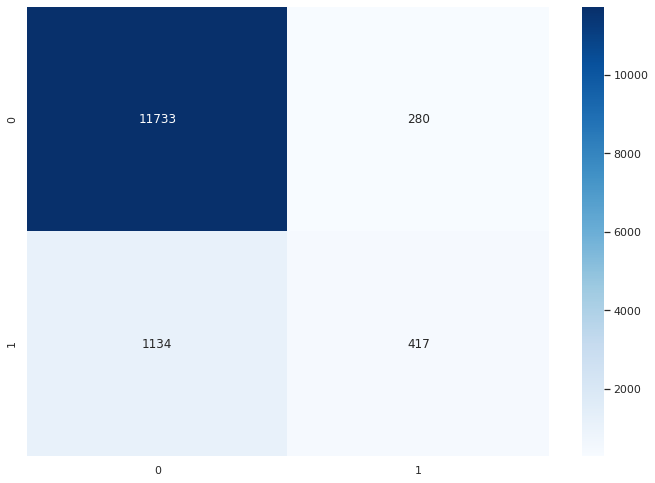

In [27]:
sns.heatmap(metrics,annot=True,fmt='g',cmap='Blues')

In [28]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.60      0.27      0.37      1551

    accuracy                           0.90     13564
   macro avg       0.76      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



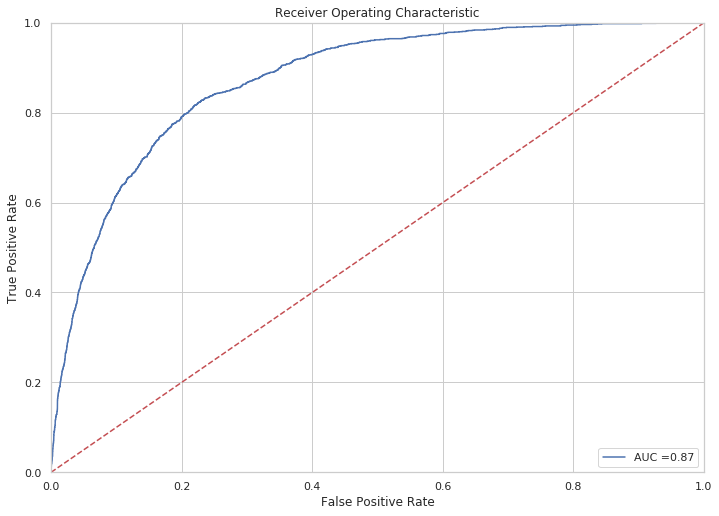

In [29]:
probability=Logestic_Model.predict_proba(test_X)
pred=probability[:,1]
fpr,tpr,thresh=roc_curve(test_y,pred)
roc_auc=auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
LR_accuracy=accuracy_score(test_y,predict)
LR_accuracy

0.8957534650545562

In [31]:
LR_AUC=roc_auc
LR_AUC

0.873266941685729

In [32]:
LR_Gini = 2*roc_auc - 1
LR_Gini

0.7465338833714581

<h3>Obv:</h3>
The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is not so good (417 out of 1134).<br>
The confusion matrix shows that the model prediction of customer subscribe term deposit not that satisfactory. This maybe due to lack of available data of customers who goes for subscribing term deposit for the model to learn.<br>As we can see the accuracy is 89.6% along with Area Under the Curve is87.3% which pretty good.<br>
The Gini value is 0.736.<br><br>
<h2> Using KNN Classification Model</h2>
<br>



Predicting from the trained model

Checking for suitable number for number of nearest neighbor the model should look into for prediction

In [33]:
n=[1,3,5,7,11,13,15,17,19,21,23,25,27,29,31,33,35]
accuracy_scores=[]
for i in n:
    KNN_Model=KNeighborsClassifier(n_neighbors=i)
    KNN_Model.fit(train_X,train_y)
    predict=KNN_Model.predict(test_X)
    accuracy_scores.append(accuracy_score(test_y,predict))
accuracy_scores
    

[0.8685491005603067,
 0.8883810085520495,
 0.8930993807136538,
 0.8949424948392805,
 0.896711884399882,
 0.896638159834857,
 0.8959746387496313,
 0.8960483633146564,
 0.8961220878796815,
 0.8961958124447066,
 0.8961958124447066,
 0.8962695370097317,
 0.896638159834857,
 0.8964169861397818,
 0.8964169861397818,
 0.8960483633146564,
 0.896711884399882]

Looks like for N_neigbors = 11 the accuracy score is highest for this model.<br>
Checking fro whether we should use  manhattan_distance (p=1) or euclidean_distance (p=2)

In [34]:
p=[1,2]
accuracy_scores=[]
for i in p:
    KNN_Model=KNeighborsClassifier(n_neighbors=11,p=i)
    KNN_Model.fit(train_X,train_y)
    predict=KNN_Model.predict(test_X)
    accuracy_scores.append(accuracy_score(test_y,predict))
accuracy_scores

    

[0.8984075493954585, 0.896711884399882]

The p value doesnot make a difference in this model.

In [35]:
KNN_Model=KNeighborsClassifier(n_neighbors=13,p=1)  
KNN_Model.fit(train_X,train_y)
predict=KNN_Model.predict(test_X)
print(predict[0:200,])
Knn_matrics=confusion_matrix(test_y,predict)
Knn_matrics

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[11803,   210],
       [ 1177,   374]])

In [36]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.64      0.24      0.35      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.61      0.65     13564
weighted avg       0.88      0.90      0.88     13564



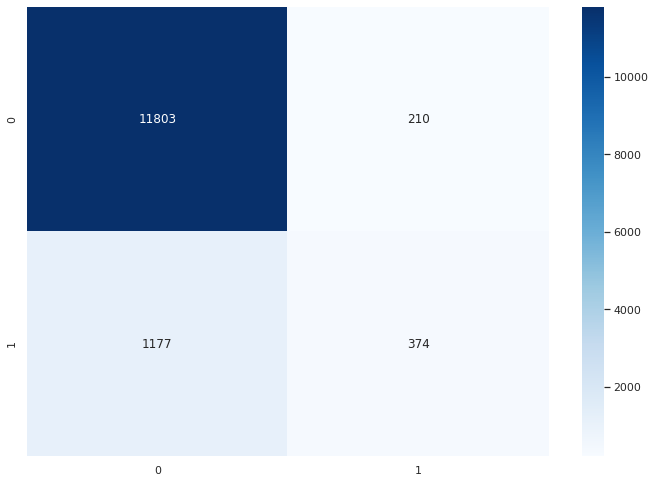

In [37]:
sns.heatmap(Knn_matrics,annot=True,cmap='Blues',fmt='g')

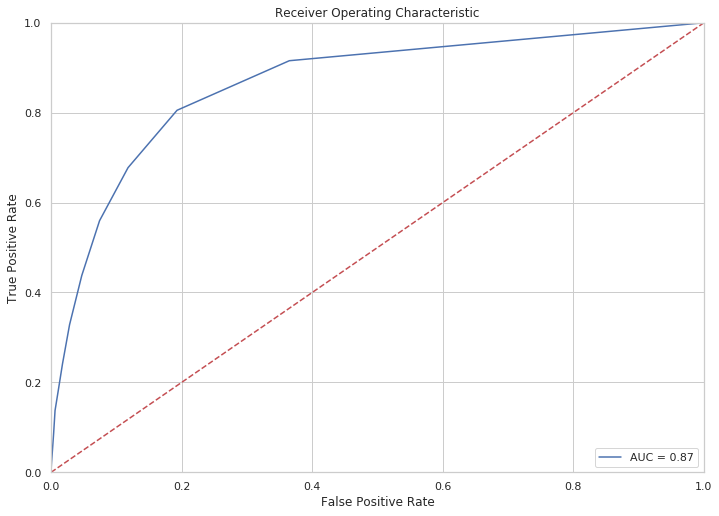

In [38]:
probs = KNN_Model.predict_proba(test_X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
KNN_accuracy=accuracy_score(test_y,predict)
KNN_accuracy

0.8977440283102329

In [40]:
KNN_Gini=2*roc_auc-1
KNN_Gini

0.730561824732856

In [41]:
KNN_AUC=roc_auc
KNN_AUC

0.865280912366428

<h3>Obv:</h3>
The heat map shows that the model perdicts customer who dont take term deposit pretty well but prediction on wheather customer taking term deposit is not good compared to Logestic regression (372 out of 1551).<br>
The confusion matrix shows that the model prediction of customer taking loan is comparitively ok.<br>As we can see the accuracy has increased to 89.7% along with Area Under the Curve is 86.5% which pretty good.<br>
The Gini value is 0.73.<br>The AUC and Gini value decreased but not by huge difference.<br>
<h2> Using Naive Bayes Classification Model</h2>
<br>
<br>
Splitting the data again and Training the model.


In [42]:

NB_Model=GaussianNB()
naiveB_Model=NB_Model.fit(train_X,train_y)
naiveB_Model

GaussianNB(priors=None, var_smoothing=1e-09)

Predicting with the above trained model.

In [43]:
predict=NB_Model.predict(test_X)
predict[0:200,]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0])

In [44]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.8412710115010321

In [45]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12013
           1       0.35      0.44      0.39      1551

    accuracy                           0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



In [46]:
NB_matrics=confusion_matrix(test_y,predict)
NB_matrics

array([[10728,  1285],
       [  868,   683]])

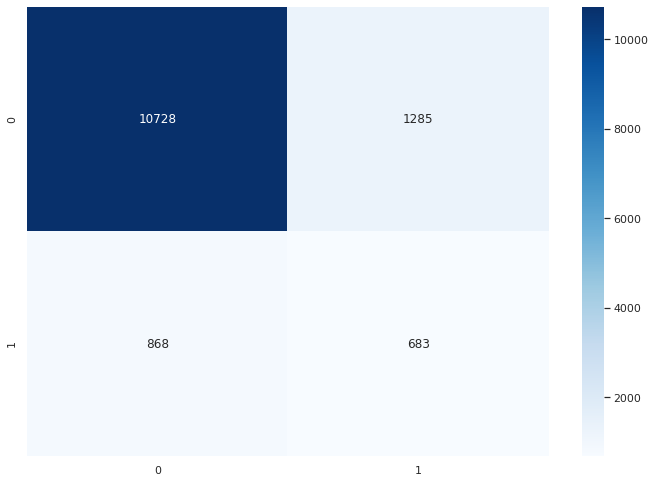

In [47]:
sns.heatmap(NB_matrics,annot=True,cmap='Blues',fmt='g')

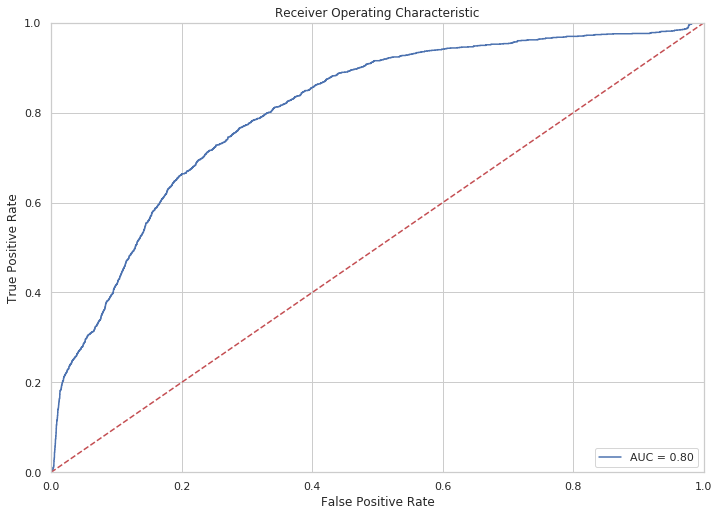

In [48]:
probs=NB_Model.predict_proba(test_X)

preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
NB_accuracy=accuracy_score(test_y,predict)
NB_accuracy

0.8412710115010321

In [50]:
NB_Gini=2*roc_auc-1
NB_Gini

0.6096594904198724

In [51]:
NB_AUC=roc_auc
NB_AUC

0.8048297452099362

<h3>Obv:</h3>
The heat map shows that the model perdicts customer how dont take personal loan pretty well as well as  prediction on wheather customer taking loan is also good compared to Logestic regression (683 out of 1551).<br>
The confusion matrix shows that the model prediction of customer taking loan is comparitively satisfactory.<br>As we can see the accuracy has decreased  to 84.1% compared to along with Area Under the Curve is 80.5% which pretty good.<br>
The Gini value is 0.60.9.<br>
<h2>SVC model</h2>

<br>
Splitting the data again and Training the model.


In [168]:

svc=SVC(kernel='sigmoid',random_state=1,probability=True)
svc_Model=svc.fit(train_X,train_y)
svc_Model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Predicting with the above trained model.

In [53]:
predict=svc_Model.predict(test_X)
predict[0:200,]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [54]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.8341197286936007

In [55]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     12013
           1       0.30      0.33      0.31      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.61     13564
weighted avg       0.84      0.83      0.84     13564



In [56]:
svc_matrics=confusion_matrix(test_y,predict)
svc_matrics

array([[10802,  1211],
       [ 1039,   512]])

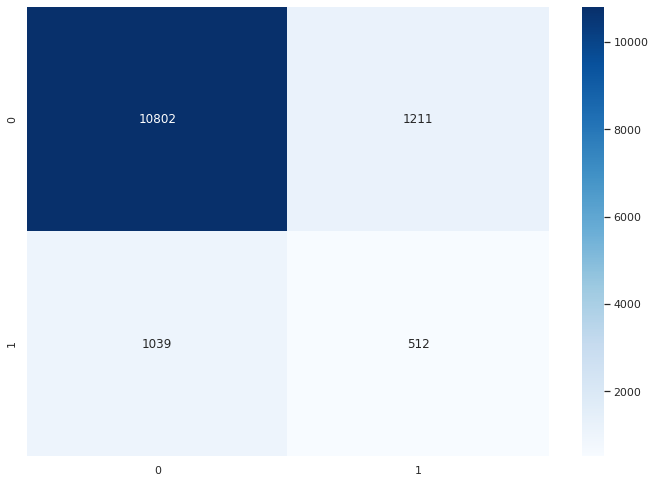

In [57]:
sns.heatmap(svc_matrics,annot=True,cmap='Blues',fmt='g')

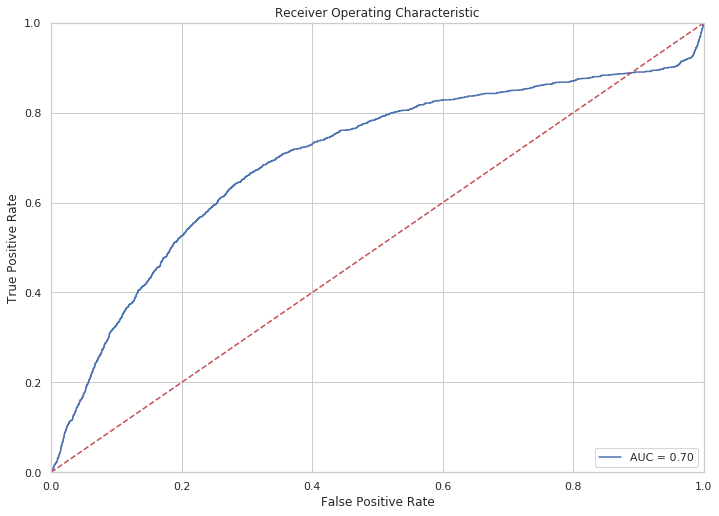

In [58]:
probs=svc_Model.predict_proba(test_X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [59]:
svc_accuracy=accuracy_score(test_y,predict)
svc_accuracy

0.8341197286936007

In [60]:
svc_Gini=2*roc_auc-1
svc_Gini

0.39202088345835095

In [61]:
svc_AUC=roc_auc
svc_AUC

0.6960104417291755

The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is not so good (512 out of 1551).<br>
The confusion matrix shows that the model prediction of customer subscribe term deposit not that satisfactory. This maybe due to lack of available data of customers who goes for subscribing term deposit for the model to learn.<br>As we can see the accuracy is 83.4% along with Area Under the Curve is 69.6% which pretty bad.<br>
The Gini value is 0.392.<br><br>
<h2> Comparing Standard Models</h2>

In [64]:
data=[[LR_accuracy,LR_Gini,LR_AUC],[KNN_accuracy,KNN_Gini,KNN_AUC],[NB_accuracy,NB_Gini,NB_AUC],[svc_accuracy,svc_Gini,svc_AUC]]

In [66]:
comparison=pd.DataFrame(data,index=['Logestic','KNN','Naive Bayes','SVC'],columns=['Accuracy','Gini','AUC'])
comparison

,Accuracy,Gini,AUC
Logestic,0.895753,0.746534,0.873267
KNN,0.897744,0.730562,0.865281
Naive Bayes,0.841271,0.609659,0.804830
SVC,0.834120,0.392021,0.696010


Till now the KNN model holds best as the accuracy is better than others.
<h2>Using Essemble techniques</h2>
<h2>Decision Tree</h2>
Training the model and selecting the best tree.

In [67]:
dtree_accuracy_score=[]
for m in range(1,18):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=m,random_state=1)
    dtree_model=dtree.fit(train_X,train_y)
    predict=dtree.predict(test_X)
    dtree_accuracy_score.append(accuracy_score(test_y,predict))
dtree_accuracy_score

[0.8858006487761723,
 0.8980389265703332,
 0.9005455617811855,
 0.9004718372161604,
 0.9001769389560602,
 0.9014302565614863,
 0.9019463285166618,
 0.9023149513417871,
 0.9003981126511353,
 0.9004718372161604,
 0.8985549985255087,
 0.8959746387496313,
 0.8953848422294308,
 0.8929519315836036,
 0.891108817457977,
 0.8863167207313477,
 0.879976408139192]

In [135]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=1)
dtree_model=dtree.fit(train_X,train_y)
predict=dtree.predict(test_X)

Predicitng from the model

In [136]:
predict=dtree_model.predict(test_X)
predict[0:200,]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [137]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.9023149513417871

In [138]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.38      0.47      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [139]:
dtree_matrics=confusion_matrix(test_y,predict)
dtree_matrics

array([[11642,   371],
       [  954,   597]])

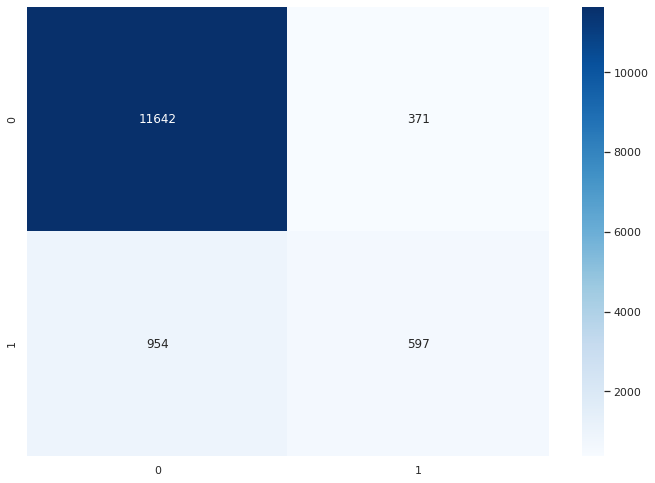

In [140]:
sns.heatmap(dtree_matrics,annot=True,cmap='Blues',fmt='g')

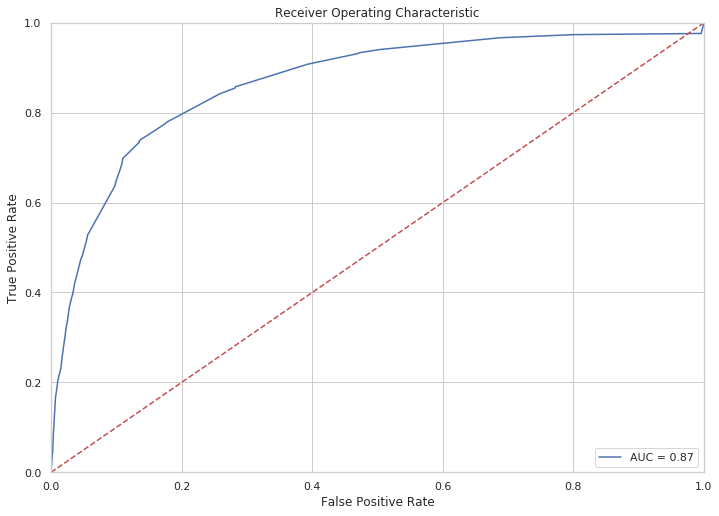

In [141]:
probs=dtree_model.predict_proba(test_X)

preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
dtree_accuracy=accuracy_score(test_y,predict)
dtree_accuracy

0.9023149513417871

In [143]:
dtree_Gini=2*roc_auc-1
dtree_Gini

0.7333630024597788

In [144]:
dtree_AUC=roc_auc
dtree_AUC

0.8666815012298894

The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is comparitively good (597 out of 1551).<br>
The confusion matrix shows that the model prediction of customer subscribe term deposit not that satisfactory. This maybe due to lack of available data of customers who goes for subscribing term deposit for the model to learn.<br>As we can see the accuracy is 90.23% along with Area Under the Curve is 86.6% which pretty gppd.<br>
The Gini value is 0.866.<br><br>
<h2> Bagging Model</h2>
Training the model.

In [79]:
#bagging=BaggingClassifier(n_estimators=50,random_state=1)
bagging_accuracy_score=[]
for m in range(50,90):
    bagging=BaggingClassifier(n_estimators=m,random_state=1)    
    bagging_model=bagging.fit(train_X,train_y)
    predict=dtree.predict(test_X)
    bagging_accuracy_score.append(accuracy_score(test_y,predict))
bagging_accuracy_score

[0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871,
 0.9023149513417871]

Predicting from the model

In [172]:
bagging=BaggingClassifier(n_estimators=50,random_state=1)    
bagging_model=bagging.fit(train_X,train_y)
predict=bagging.predict(test_X)

In [173]:
predict=bagging_model.predict(test_X)
predict[0:200,]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [174]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.903273370687113

In [175]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12013
           1       0.60      0.46      0.52      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



In [176]:
bagging_matrics=confusion_matrix(test_y,predict)
bagging_matrics

array([[11531,   482],
       [  830,   721]])

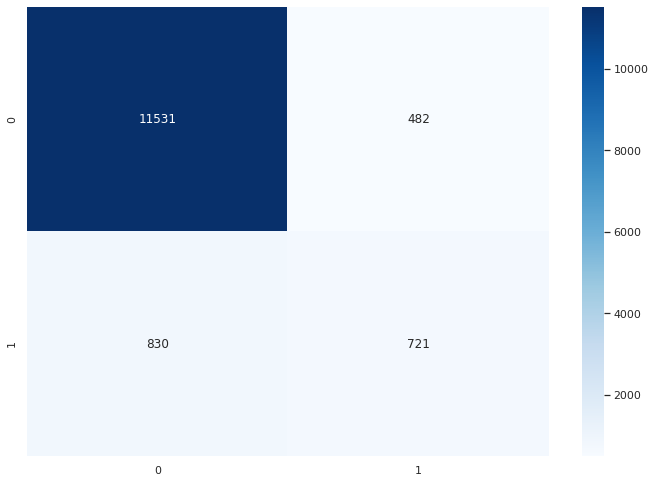

In [177]:
sns.heatmap(bagging_matrics,annot=True,cmap='Blues',fmt='g')

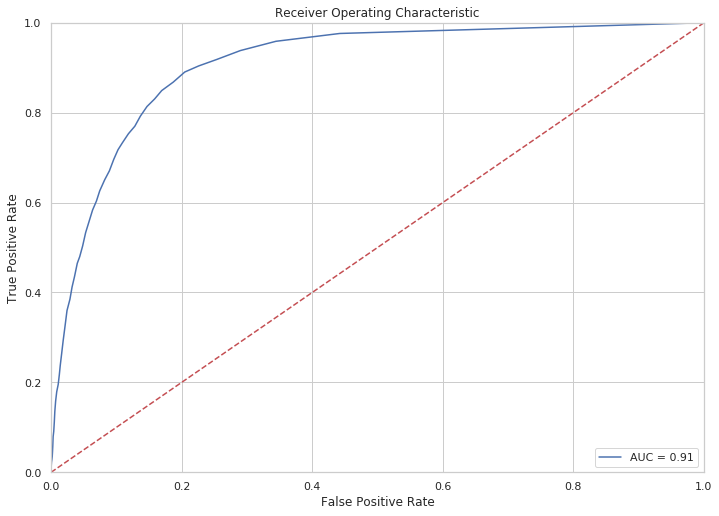

In [131]:
probs=bagging_model.predict_proba(test_X)

preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [132]:
bagging_accuracy=accuracy_score(test_y,predict)
bagging_accuracy

0.903273370687113

In [133]:
bagging_Gini=2*roc_auc-1
bagging_Gini

0.8157903620744409

In [134]:
bagging_AUC=roc_auc
bagging_AUC

0.9078951810372204

The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is not so good (721 out of 1551).<br>
 we can see the accuracy is 90.32% along with Area Under the Curve is 90.7% which good.<br>
The Gini value is 0.8157.<br><br>
<h2> AdaBoosting Model</h2>
Traing the data

In [90]:
aboost_accuracy_score=[]
for m in range(50,90):
    aboost=AdaBoostClassifier(n_estimators=m,random_state=1)    
    aboost_model=aboost.fit(train_X,train_y)
    predict=aboost.predict(test_X)
    aboost_accuracy_score.append(accuracy_score(test_y,predict))
aboost_accuracy_score

[0.901061633736361,
 0.9009141846063108,
 0.9006930109112357,
 0.9014302565614863,
 0.9012828074314362,
 0.9012090828664111,
 0.9012090828664111,
 0.9014302565614863,
 0.9016514302565615,
 0.9012090828664111,
 0.9015039811265113,
 0.9017988793866116,
 0.9016514302565615,
 0.9020200530816869,
 0.9015039811265113,
 0.9021675022117369,
 0.9012828074314362,
 0.901061633736361,
 0.9012090828664111,
 0.9006930109112357,
 0.9006930109112357,
 0.9015039811265113,
 0.9008404600412857,
 0.9012828074314362,
 0.901061633736361,
 0.9009879091713359,
 0.9012828074314362,
 0.901135358301386,
 0.9012828074314362,
 0.9012828074314362,
 0.9006930109112357,
 0.90002948982601,
 0.9009141846063108,
 0.9007667354762607,
 0.9007667354762607,
 0.9009879091713359,
 0.9005455617811855,
 0.9006930109112357,
 0.9007667354762607,
 0.9009879091713359]

In [91]:
aboost=AdaBoostClassifier(n_estimators=66,random_state=1)    
aboost_model=aboost.fit(train_X,train_y)
predict=aboost.predict(test_X)

Predicting from the model.

In [92]:
predict=aboost_model.predict(test_X)
predict[0:200,]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [93]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.9012828074314362

In [94]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.36      0.45      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [95]:
aboost_matrics=confusion_matrix(test_y,predict)
aboost_matrics

array([[11670,   343],
       [  996,   555]])

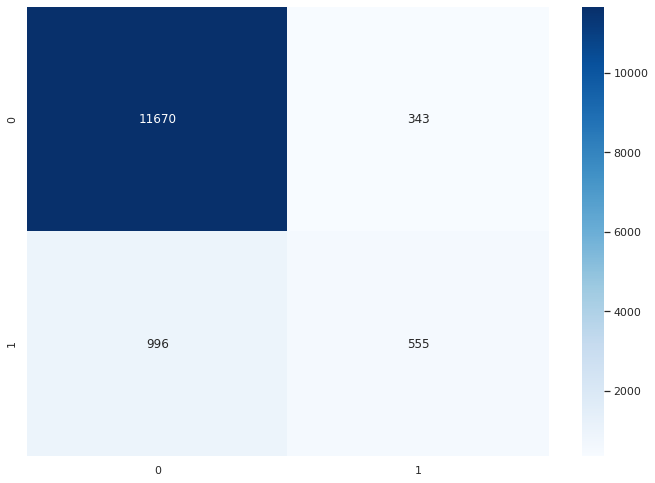

In [96]:
sns.heatmap(aboost_matrics,annot=True,cmap='Blues',fmt='g')

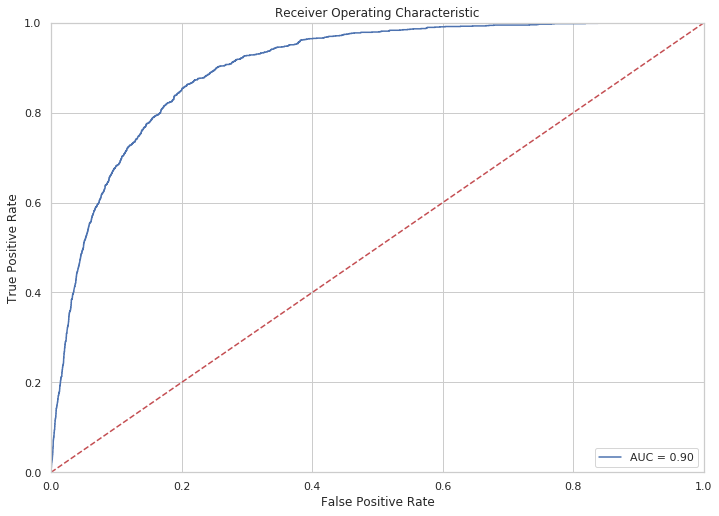

In [97]:
probs=aboost_model.predict_proba(test_X)

preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [98]:
aboost_accuracy=accuracy_score(test_y,predict)
aboost_accuracy

0.9012828074314362

In [99]:
aboost_Gini=2*roc_auc-1
aboost_Gini

0.801942855480601

In [100]:
aboost_AUC=roc_auc
aboost_AUC

0.9009714277403005

The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is not so good (555 out of 1551).<br>
 we can see the accuracy is 90.1% along with Area Under the Curve is 90.1% which good.<br>
The Gini value is 0.801.<br><br>
<h2> Gradient Boosting Model</h2>
Training the model

In [101]:
gboost_accuracy_score=[]
for m in range(50,90):
    gboost=GradientBoostingClassifier(n_estimators=m,random_state=1)    
    gboost_model=gboost.fit(train_X,train_y)
    predict=gboost.predict(test_X)
    gboost_accuracy_score.append(accuracy_score(test_y,predict))
aboost_accuracy_score

[0.901061633736361,
 0.9009141846063108,
 0.9006930109112357,
 0.9014302565614863,
 0.9012828074314362,
 0.9012090828664111,
 0.9012090828664111,
 0.9014302565614863,
 0.9016514302565615,
 0.9012090828664111,
 0.9015039811265113,
 0.9017988793866116,
 0.9016514302565615,
 0.9020200530816869,
 0.9015039811265113,
 0.9021675022117369,
 0.9012828074314362,
 0.901061633736361,
 0.9012090828664111,
 0.9006930109112357,
 0.9006930109112357,
 0.9015039811265113,
 0.9008404600412857,
 0.9012828074314362,
 0.901061633736361,
 0.9009879091713359,
 0.9012828074314362,
 0.901135358301386,
 0.9012828074314362,
 0.9012828074314362,
 0.9006930109112357,
 0.90002948982601,
 0.9009141846063108,
 0.9007667354762607,
 0.9007667354762607,
 0.9009879091713359,
 0.9005455617811855,
 0.9006930109112357,
 0.9007667354762607,
 0.9009879091713359]

In [102]:
gboost=GradientBoostingClassifier(n_estimators=66,random_state=1)    
gboost_model=gboost.fit(train_X,train_y)

Predicting from the model

In [103]:
predict=gboost_model.predict(test_X)`
predict[0:200,]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [104]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.9037894426422884

In [105]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.64      0.37      0.47      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [106]:
gboost_matrics=confusion_matrix(test_y,predict)
gboost_matrics

array([[11690,   323],
       [  982,   569]])

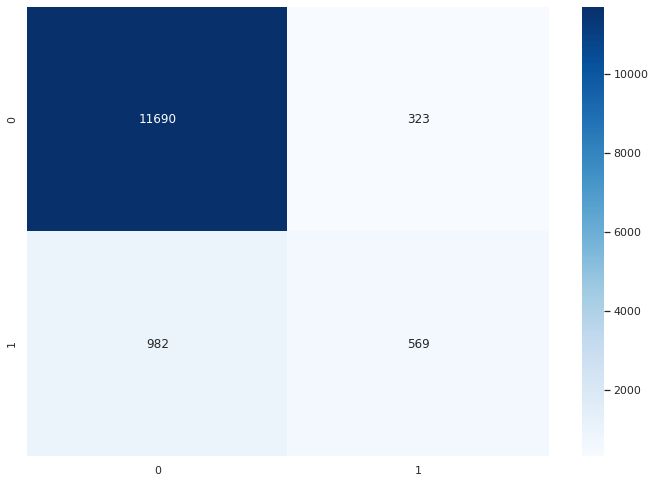

In [107]:
sns.heatmap(gboost_matrics,annot=True,cmap='Blues',fmt='g')

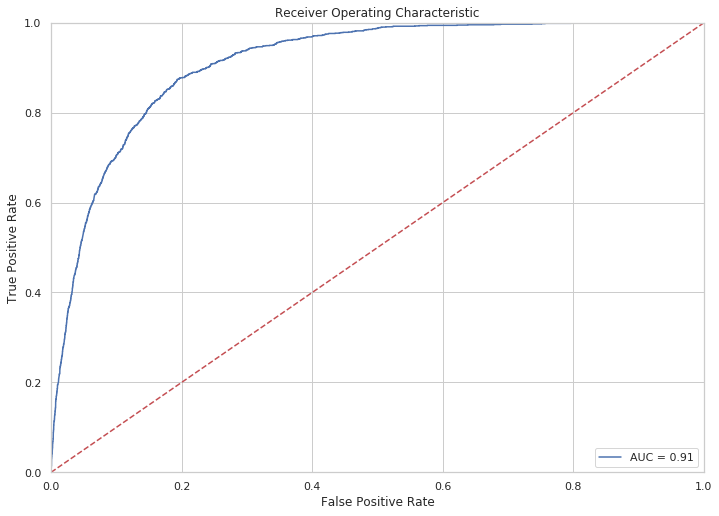

In [108]:
probs=gboost_model.predict_proba(test_X)

preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [109]:
gboost_accuracy=accuracy_score(test_y,predict)
gboost_accuracy

0.9037894426422884

In [110]:
gboost_Gini=2*roc_auc-1
gboost_Gini

0.8222438801120409

In [111]:
gboost_AUC=roc_auc
gboost_AUC

0.9111219400560204

The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is better (569 out of 1551).<br>
 we can see the accuracy is 90.37% along with Area Under the Curve is 91.1% which good.<br>
The Gini value is 0.8222.<br><br>
<h2> Random Forest Model</h2>
Training the model

In [112]:
R_forest=RandomForestClassifier(n_estimators=50,random_state=1,max_features=15)    
R_forest_model=R_forest.fit(train_X,train_y)
predict=R_forest.predict(test_X)

Predicting from the model

In [114]:
predict=R_forest_model.predict(test_X)
predict[0:200,]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [115]:
ac_score=accuracy_score(test_y,predict)
ac_score

0.898997345915659

In [116]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     12013
           1       0.57      0.45      0.50      1551

    accuracy                           0.90     13564
   macro avg       0.75      0.70      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [117]:
R_forest_matrics=confusion_matrix(test_y,predict)
R_forest_matrics

array([[11499,   514],
       [  856,   695]])

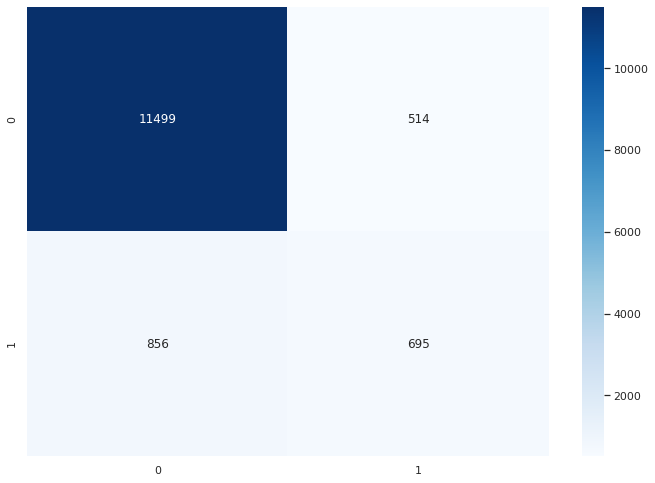

In [118]:
sns.heatmap(R_forest_matrics,annot=True,cmap='Blues',fmt='g')

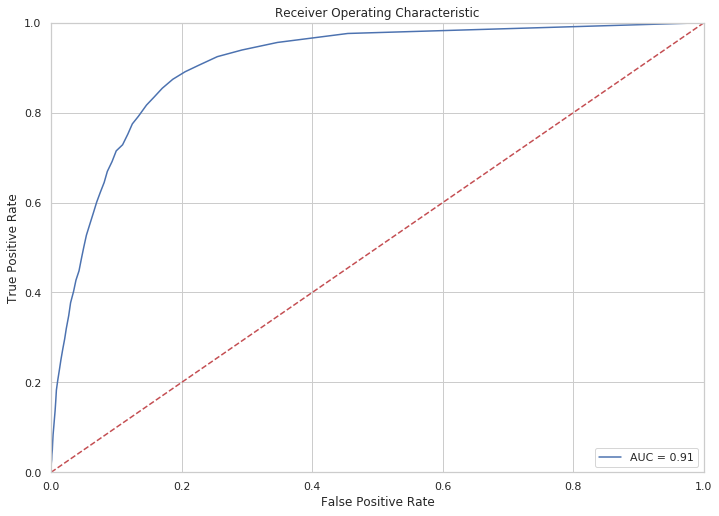

In [119]:
probs=R_forest_model.predict_proba(test_X)

preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
R_forest_accuracy=accuracy_score(test_y,predict)
R_forest_accuracy

0.898997345915659

In [121]:
R_forest_Gini=2*roc_auc-1
R_forest_Gini

0.8145633977117952

In [122]:
R_forest_AUC=roc_auc
R_forest_AUC

0.9072816988558976

The heat map shows that the model perdicts customer how dont subscribe term deposit pretty well whereas prediction on customer subscribing is good (695 out of 1551).<br>
 we can see the accuracy is 89.89% along with Area Under the Curve is 90.7% which good.<br>
The Gini value is 0.8145.<br><br>
<h2> Comparing all the Model</h2>

In [145]:
data=[[LR_accuracy,LR_Gini,LR_AUC],[KNN_accuracy,KNN_Gini,KNN_AUC],[NB_accuracy,NB_Gini,NB_AUC],[svc_accuracy,svc_Gini,svc_AUC],
     [dtree_accuracy,dtree_Gini,dtree_AUC],[bagging_accuracy,bagging_Gini,bagging_AUC],[aboost_accuracy,aboost_Gini,aboost_Gini],
     [gboost_accuracy,gboost_Gini,gboost_AUC],[R_forest_accuracy,R_forest_Gini,R_forest_AUC]]

In [146]:
comparison=pd.DataFrame(data,index=['Logestic','KNN','Naive Bayes','SVC','Decision Tree','Bagging','AdaBoosting','GradientBoosting','Random Forest'],columns=['Accuracy','Gini','AUC'])
comparison

,Accuracy,Gini,AUC
Logestic,0.895753,0.746534,0.873267
KNN,0.897744,0.730562,0.865281
Naive Bayes,0.841271,0.609659,0.804830
SVC,0.834120,0.392021,0.696010
Decision Tree,0.902315,0.733363,0.866682
Bagging,0.903273,0.815790,0.907895
AdaBoosting,0.901283,0.801943,0.801943
GradientBoosting,0.903789,0.822244,0.911122
Random Forest,0.898997,0.814563,0.907282


As for the above matrix, the accuracy of Gradient Boosting model is highest among others along with the Gini value and AUC is also better than other model <br> 
<h3>So, in this case Gradient Boosting would be the best model to use for predicting the likelihood of a liability customer purchasing Term Deposit.<h3>

<h5>Thank you</h5>